In [1]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00


In [2]:
# Quantum Phase Estimation (QPE) using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qpe_circuit(num_count_qubits, unitary, theta):
    """
    Constructs the Quantum Phase Estimation (QPE) circuit.
    num_count_qubits: number of counting qubits
    unitary: unitary gate (to apply controlled operations)
    theta: phase parameter (for U gate)
    """
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc

In [3]:
def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

In [4]:
def run_qpe(num_count_qubits=3, theta=0.125):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()
    print(qc.draw(output='text'))

In [5]:
if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

Running Quantum Phase Estimation with 3 counting qubits and phase 0.125
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     

**Tasks**

---



In [18]:
!pip install qiskit qiskit-aer pylatexenc --quiet


In [20]:
!pip install pylatexenc --quiet


In [25]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error
import numpy as np
import matplotlib.pyplot as plt

def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


def qpe_circuit(num_count_qubits, theta):
    """Construct a Quantum Phase Estimation (QPE) circuit."""
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)
    qc.h(range(num_count_qubits))               # Apply Hadamards
    qc.x(num_count_qubits)                      # Prepare |1> on target qubit
    for qubit in range(num_count_qubits):       # Controlled phase shifts
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)
    inverse_qft(qc, num_count_qubits)           # Apply inverse QFT
    qc.measure(range(num_count_qubits), range(num_count_qubits))  # Measure
    return qc

**TASK 1- change the phase value**

In [26]:
def task1_change_phase_values():
    print("\n Task 1: Changing Phase Values\n")
    sim = AerSimulator()
    thetas = [0.125, 0.25, 0.375, 0.5]

    for theta in thetas:
        qc = qpe_circuit(3, theta)
        compiled = transpile(qc, sim)
        result = sim.run(compiled, shots=2048).result()
        counts = result.get_counts()

        print(f"Phase θ = {theta}")
        print(qc.draw('text'))

        plt.show()

        plot_histogram(counts)
        plt.title(f"QPE Output Histogram (θ = {theta})")
        plt.xlabel("Measured phase (binary)")
        plt.ylabel("Probability")
        plt.show

**TASK 2 — Increase Number of Counting Qubits**

In [27]:
def task2_increase_qubits():
    print("\n Task 2: Increasing Counting Qubits\n")
    sim = AerSimulator()
    qc = qpe_circuit(5, 0.125)
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=2048).result()
    counts = result.get_counts()

    print(qc.draw('text'))

    plt.show()

    plot_histogram(counts)
    plt.title("QPE with 5 Counting Qubits (θ = 0.125)")
    plt.show()

**TASK 3 — Compare with Theoretical Output**

In [28]:
def task3_compare_theoretical():
    print("\n Task 3: Comparing with Theoretical Output\n")

    def theoretical_binary(theta, n_bits):
        value = int(theta * (2 ** n_bits))
        return format(value, f'0{n_bits}b')

    sim = AerSimulator()
    num_qubits = 4
    theta = 0.375
    qc = qpe_circuit(num_qubits, theta)
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=2048).result()
    counts = result.get_counts()

    expected = theoretical_binary(theta, num_qubits)
    print(f"Theoretical binary for θ = {theta}: {expected}")
    print("Measured counts:", counts)

    print(qc.draw('text'))

    plt.show()

    plot_histogram(counts)
    plt.title(f"Theoretical vs Measured (θ = {theta})")
    plt.show()

**TASK 4 — Visualize Inverse QFT Structure**

In [29]:
def task4_visualize_qft():
    print("\n Task 4: Visualizing Inverse QFT Structure\n")
    num_count_qubits = 3
    theta = 0.25
    qc = qpe_circuit(num_count_qubits, theta)
    print("Circuit structure showing inverse QFT part:")
    print(qc.draw('text'))

    plt.show()

**TASK 5 — Add Noise and Observe Accuracy Drop**

In [32]:
def task5_noise_simulation():
    print("\n Task 5: Simulating Noise Impact\n")

    # Create noise model
    noise_model = NoiseModel()
    error_1q = depolarizing_error(0.01, 1)
    error_2q = depolarizing_error(0.02, 2)
    noise_model.add_all_qubit_quantum_error(error_1q, ['h'])
    noise_model.add_all_qubit_quantum_error(error_2q, ['cp'])

    sim = AerSimulator(noise_model=noise_model)
    num_qubits = 3
    theta = 0.25
    qc = qpe_circuit(num_qubits, theta)
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=2048).result()
    counts = result.get_counts()

    print(qc.draw('text'))

    plt.show()

    plot_histogram(counts)
    plt.title("Noisy QPE Results (θ = 0.25)")
    plt.show()

**MAIN Execution**

Running All 5 Quantum Phase Estimation Tasks...


 Task 1: Changing Phase Values

Phase θ = 0.125
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«

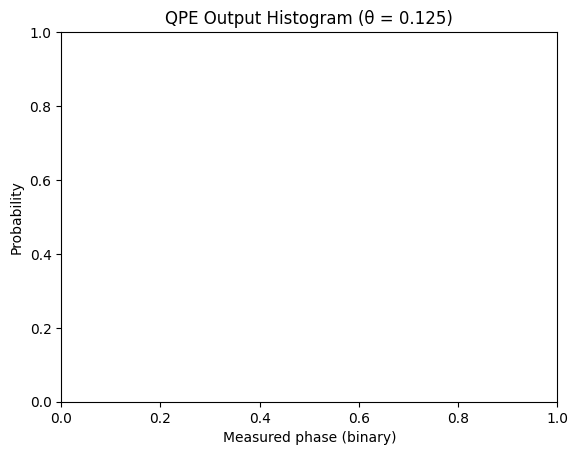

Phase θ = 0.375
     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«      │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─■─────────╫─┤ H ├─╫

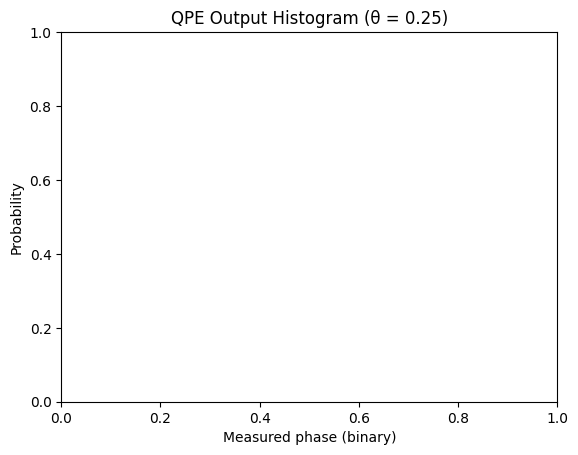

Phase θ = 0.5
     ┌───┐                          ┌───┐                                   ┌─┐»
q_0: ┤ H ├─■──────────────────────X─┤ H ├─■──────────────■──────────────────┤M├»
     ├───┤ │                      │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘»
q_1: ┤ H ├─┼──────■───────────────┼───────■────────┤ H ├─┼─────────■─────────╫─»
     ├───┤ │      │               │                └───┘ │P(-π/4)  │P(-π/2)  ║ »
q_2: ┤ H ├─┼──────┼───────■───────X──────────────────────■─────────■─────────╫─»
     ├───┤ │P(π)  │P(2π)  │P(4π)                                             ║ »
q_3: ┤ X ├─■──────■───────■──────────────────────────────────────────────────╫─»
     └───┘                                                                   ║ »
c: 3/════════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                
«q_0: ───────────
«          ┌─┐   
«q_1: ─────┤M├───
«     ┌───┐└╥┘┌─┐
«q_2:

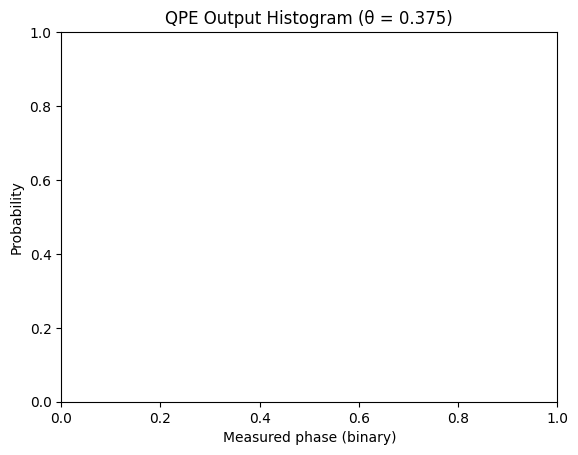


 Task 2: Increasing Counting Qubits

     ┌───┐                                            ┌───┐               »
q_0: ┤ H ├─■────────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                        │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼────────■─────────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │        │                         │     │                └───┘»
q_2: ┤ H ├─┼────────┼────────■────────────────┼─────┼─────────────────────»
     ├───┤ │        │        │                │     │                     »
q_3: ┤ H ├─┼────────┼────────┼──────■─────────X─────┼─────────────────────»
     ├───┤ │        │        │      │               │                     »
q_4: ┤ H ├─┼────────┼────────┼──────┼───────■───────X─────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)  │P(4π)                        »
q_5: ┤ X ├─■────────■────────■──────■───────■─────────────────────────────»
     └───┘                                        

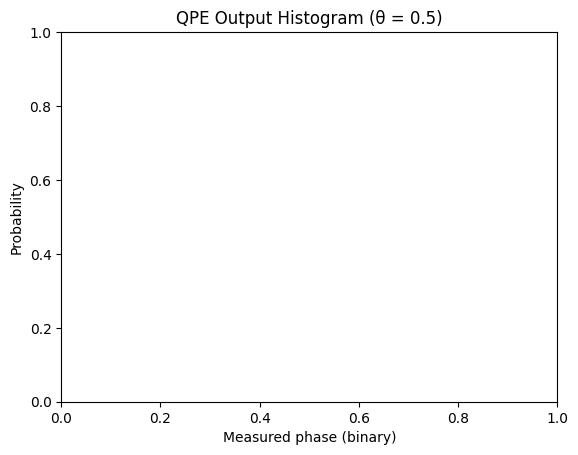

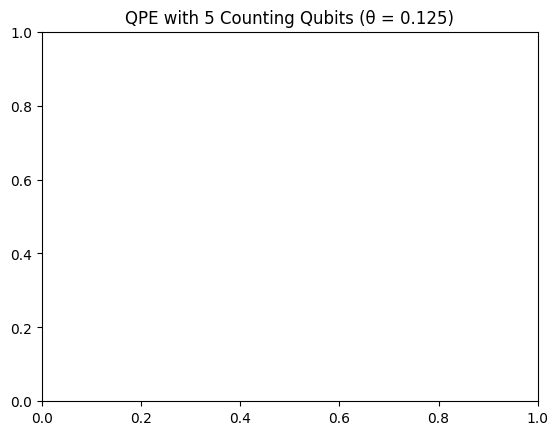


 Task 3: Comparing with Theoretical Output

Theoretical binary for θ = 0.375: 0110
Measured counts: {'0110': 2048}
     ┌───┐                                       ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                                   │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■───────────────────X─────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                   │     │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■─────────X─────┼──────────────────────■────────»
     ├───┤ │         │         │               │                               »
q_3: ┤ H ├─┼─────────┼─────────┼───────■───────X───────────────────────────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)  │P(6π)                                  »
q_4: ┤ X ├─■─────────■─────────■───────■───────────────────────────────────────»
     └───┘                                                                

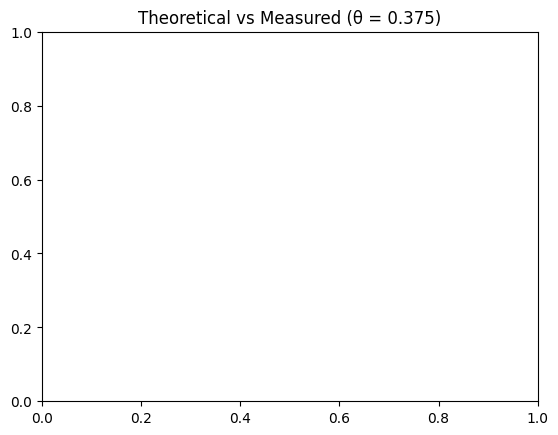


 Task 4: Visualizing Inverse QFT Structure

Circuit structure showing inverse QFT part:
     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────


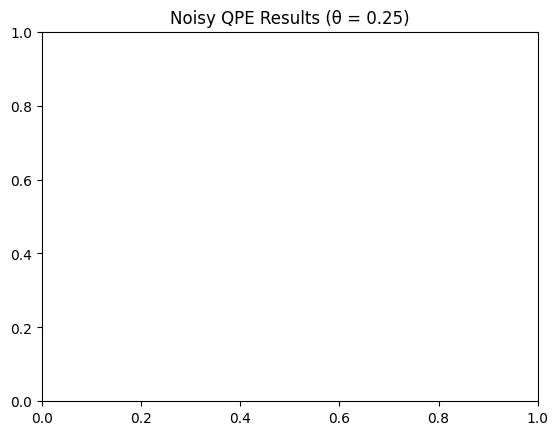

In [33]:
if __name__ == "__main__":
    print("Running All 5 Quantum Phase Estimation Tasks...\n")
    task1_change_phase_values()
    task2_increase_qubits()
    task3_compare_theoretical()
    task4_visualize_qft()
    task5_noise_simulation()